In [1]:
#importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
# Ignore specific warning
warnings.filterwarnings("ignore")

In [3]:
#reading dataset

df_train = pd.read_csv("train.csv")
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435



DateTime columns for Pickup and Dropoff which needs **Feature extraction** as there might be lots of hidden info.

In [4]:
#Shape of data

print ('No. of Examples : ',df_train.shape[0])
print ('No. of Features : ', df_train.shape[1])

No. of Examples :  1458644
No. of Features :  11


  Checking for Datatype and Null Values

In [5]:
#Attribute information

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
#checking missing values

df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

- Quite good that our Dataset has no NULL values and duplicates too!

# EDA & Data Preprocessing

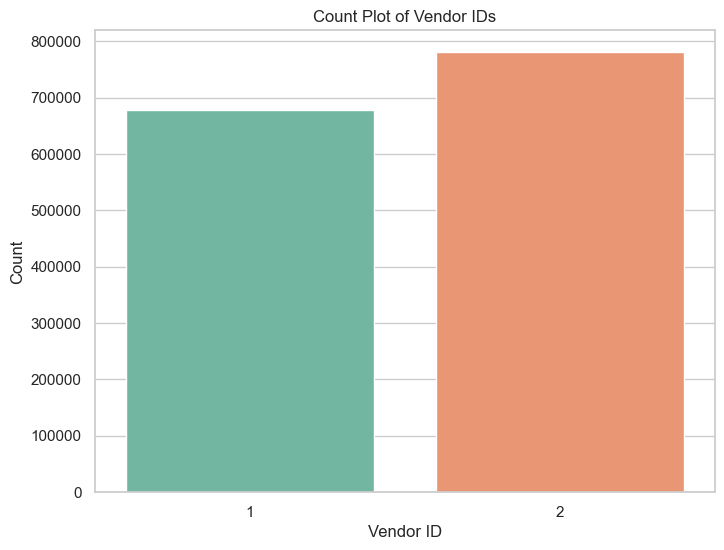

In [8]:
#vendor_id - a code indicating the provider associated with the trip record


sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='vendor_id', data=df_train, palette='Set2')
plt.xlabel('Vendor ID')  
plt.ylabel('Count')      
plt.title('Count Plot of Vendor IDs') 
plt.show()

- From Above Visualization, we can say that there are **2 vendors** (Service Providers).


- 2nd Service provider is the most opted one by New Yorkers.

Text(0.5, 1.0, 'Store and Forward Flag')

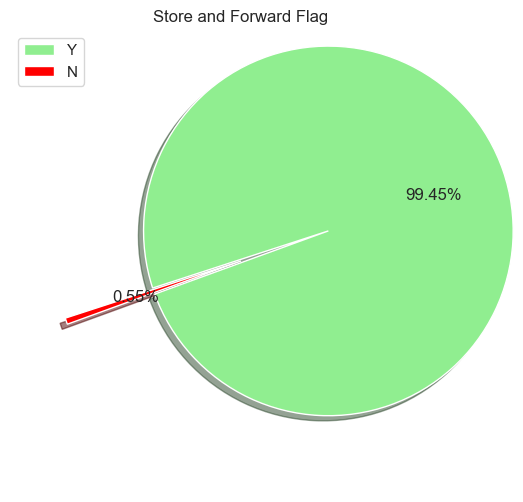

In [9]:
#Store & Forward flag

plt.figure(figsize=(8,6))
plt.pie(df_train['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'red'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip.


- Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server.

In [10]:
# Testing data

test = pd.read_csv("test.csv")
test = df_train.drop(['id','dropoff_datetime','pickup_datetime'],axis= 1)
test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enco = LabelEncoder()
df_train['store_and_fwd_flag'] = enco.fit_transform(df_train['store_and_fwd_flag'])
df_train['vendor_id'] = enco.fit_transform(df_train['vendor_id'])

test['store_and_fwd_flag'] = enco.fit_transform(df_train['store_and_fwd_flag'])
test['vendor_id'] = enco.fit_transform(df_train['vendor_id'])

- Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease.

# Descriptive Statistics

Text(0.5, 1.0, 'Descriptive Stats')

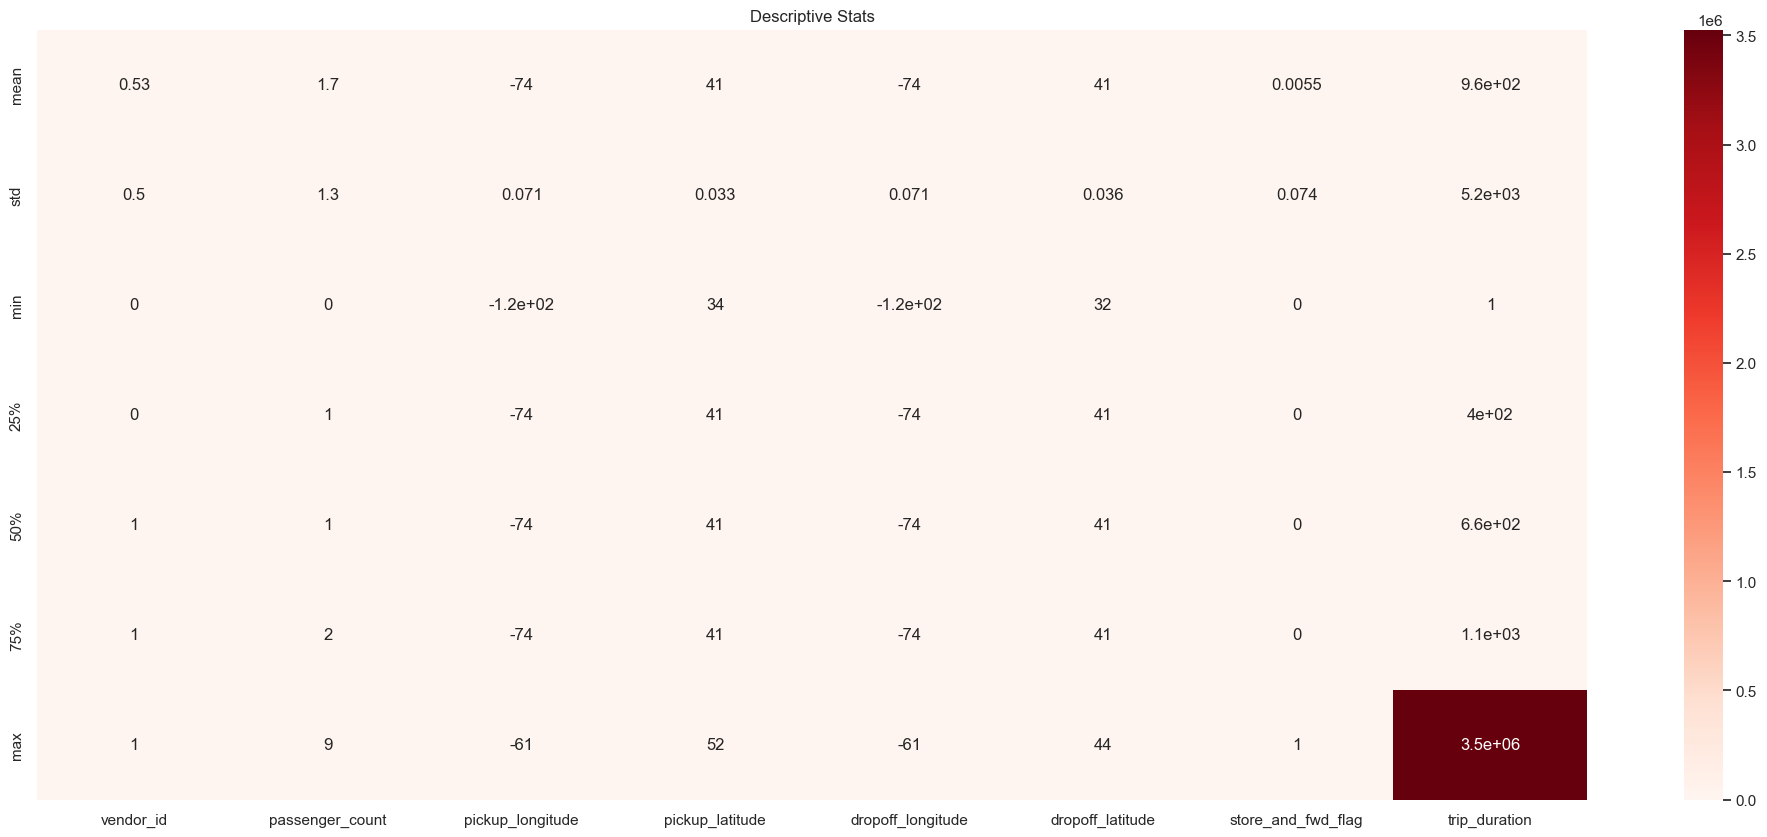

In [12]:
#Descriptive Stats

plt.figure(figsize=(25,10))
sns.heatmap(df_train.describe()[1:], annot=True, cmap='Reds')
plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

<Axes: title={'center': 'Outliers visualization'}>

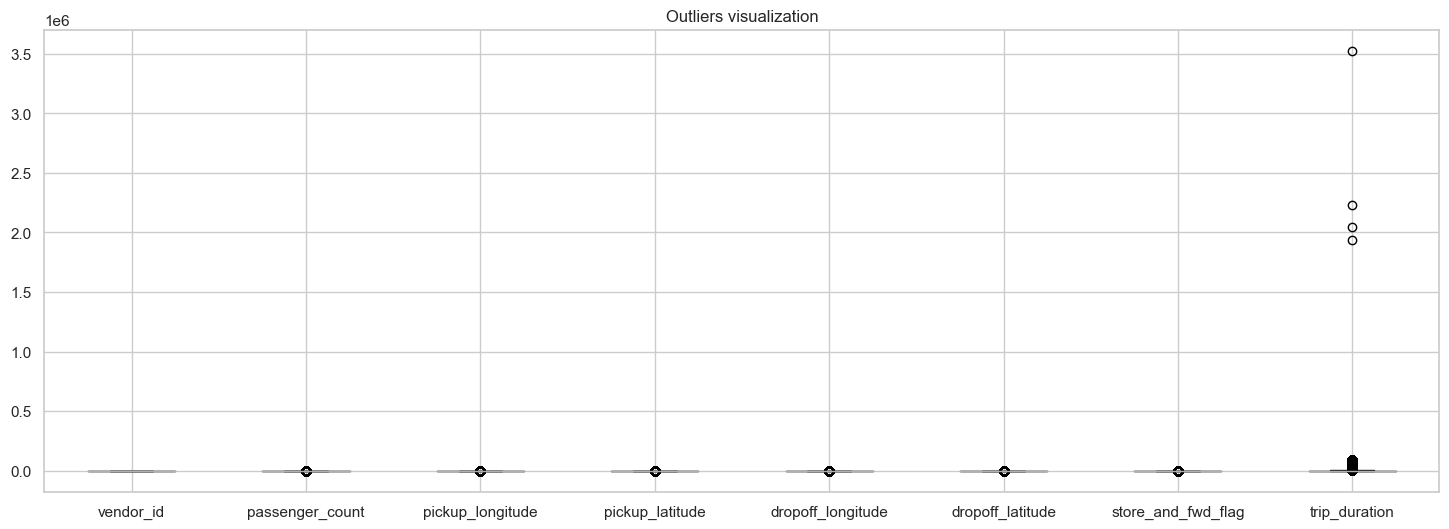

In [13]:
#Visualising outliers 

plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df_train.boxplot()

- Probably in this visualization we can clearly notice some outliers , the trips are lasting between 1900000 seconds (528 Hours) to somewhere around 3500000 (972 hours) seconds 
- which is impossible in case of taxi trips , How can a taxi trip be that long ?


- It’s Quite suspicious. We’ll have to get rid of those Outliers.

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

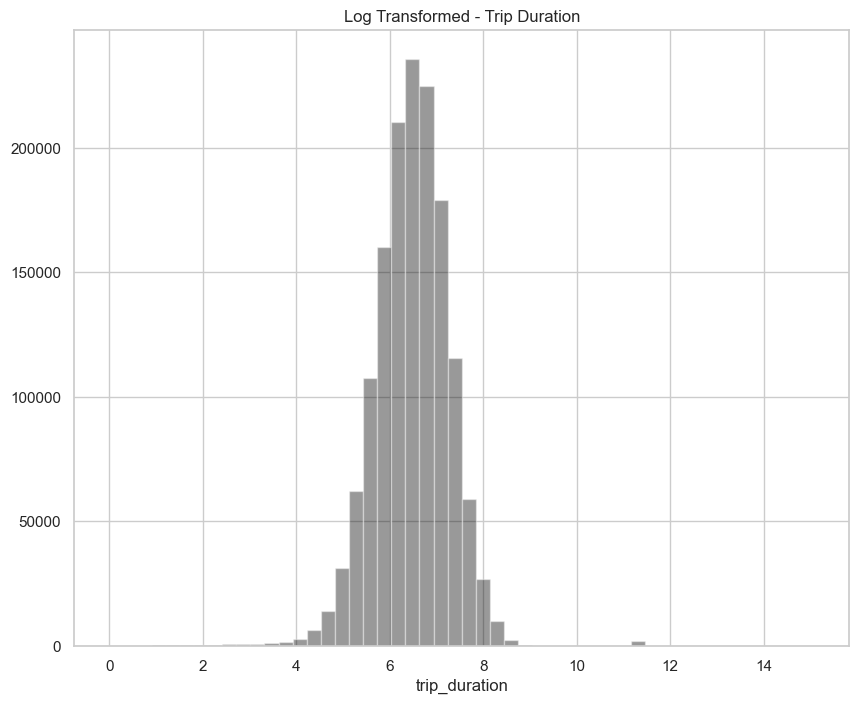

In [14]:
#Log Transformation

plt.figure(figsize=(10,8))
sns.distplot(np.log(df_train['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

- Log Transformation Smoothens outliers by proving them less weightage.

# Correlation Heatmap

<Axes: >

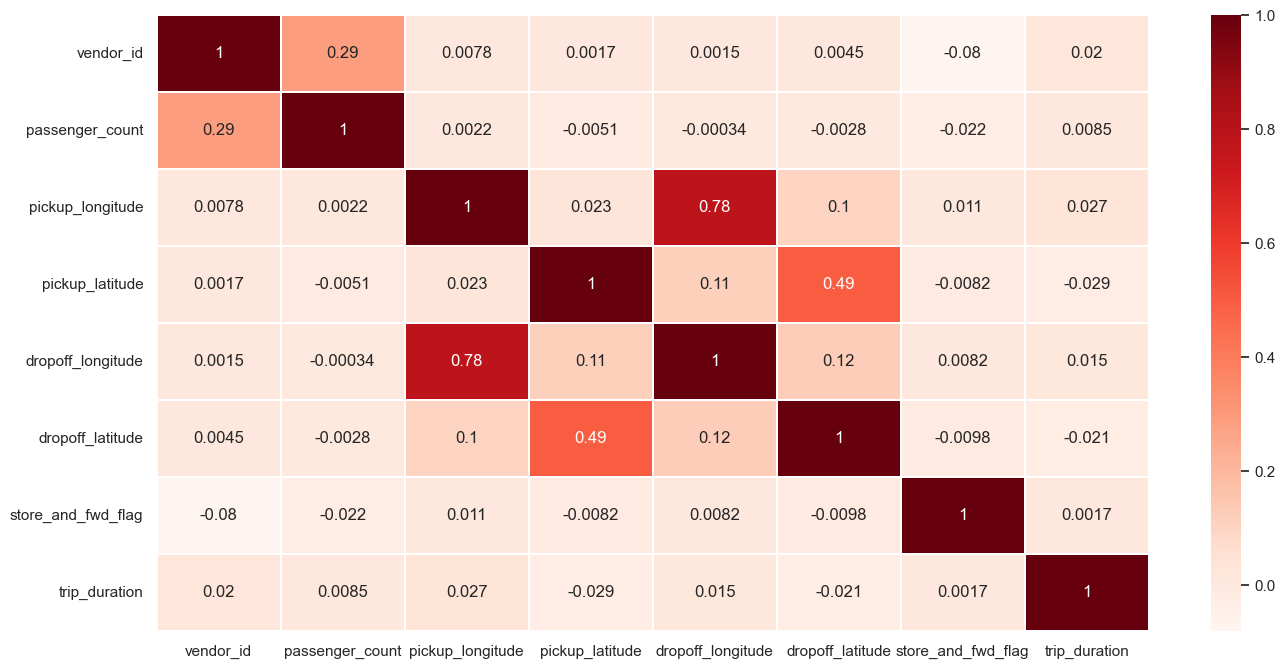

In [15]:
#Plotting Pearson Correlation heatmap

ig, ax = plt.subplots(figsize=(16,8))
x = df_train.drop(["id","pickup_datetime","dropoff_datetime"], axis=1)
sns.heatmap(x.corr(), cmap='Reds', annot=True, linewidth=.1, ax=ax)

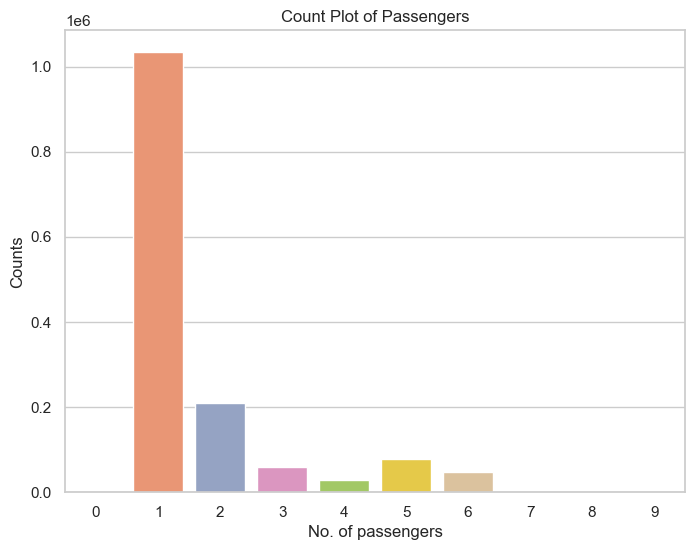

In [16]:
#Passenger count

sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='passenger_count', data=df_train, palette='Set2')
plt.xlabel('No. of passengers')  
plt.ylabel('Counts')      
plt.title('Count Plot of Passengers') 
plt.show()

Text(0.5, 1.0, 'Passenger Count Distribution')

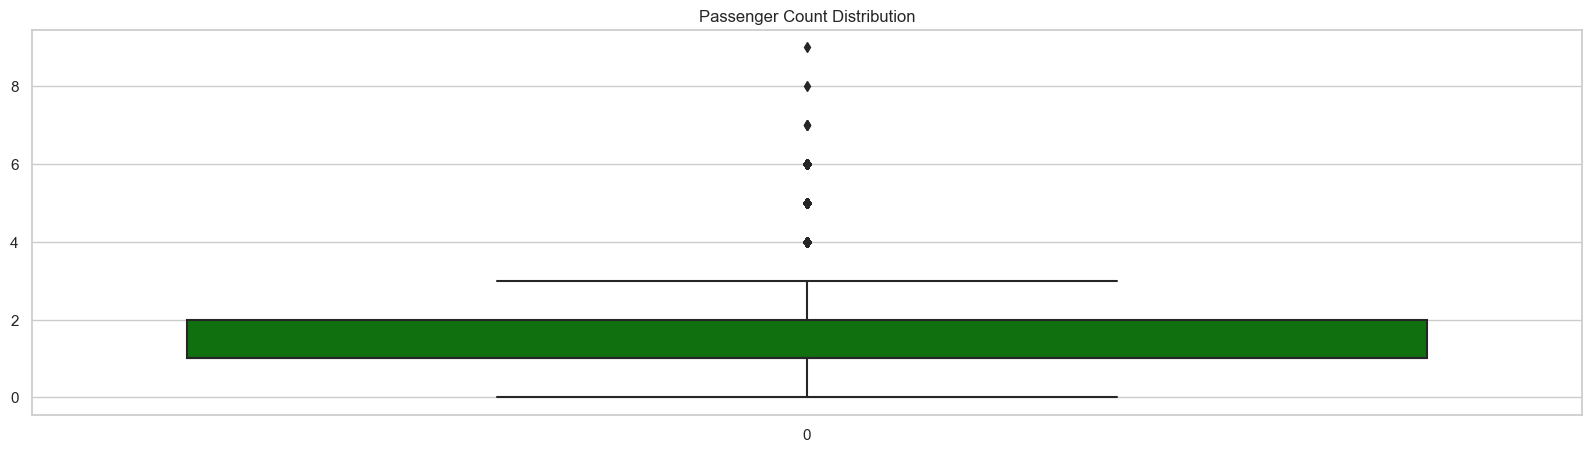

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(df_train['passenger_count'], color='Green')
plt.title('Passenger Count Distribution')

- Above viz. tells us that there were most number of trips are done by Single passenger.


- 4 - 9 passengers trip states us that cab must be a Large vehicle. 
- But one thing is Interesting to observe, there exist trip with Zero passengers 
- is it a free ride ? Or just a False data recorded ?


# Feature Engineering

In [18]:
#Extracting day, month, date, hour, mins, weekday from datetime

df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

df_train['pickup_day'] = df_train['pickup_datetime'].dt.day
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['pickup_date'] = df_train['pickup_datetime'].dt.date
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_min'] = df_train['pickup_datetime'].dt.minute
df_train['pickup_weekday'] = df_train['pickup_datetime'].dt.weekday

df_train['dropoff_min'] = df_train['dropoff_datetime'].dt.minute

- The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features. 


- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them. (For analysis purpose obviosly we can extract)


- Further we can use these columns for Analysis.

Text(0.5, 1.0, 'Hourly Pickups')

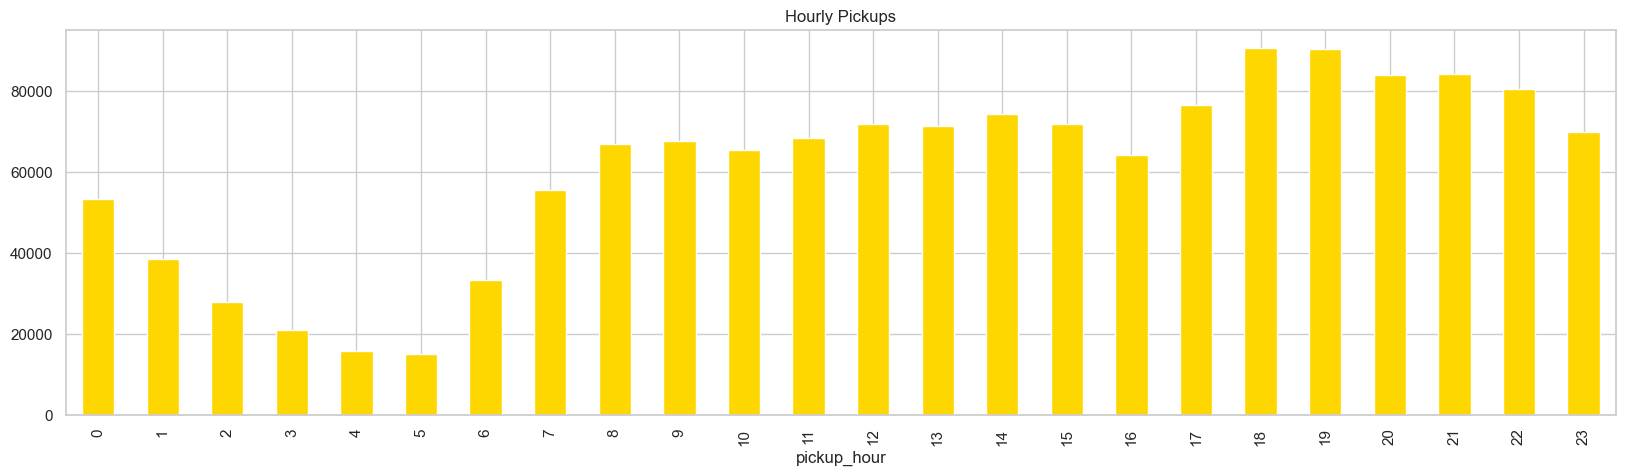

In [19]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df_train['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")

- Maximum pickups was in rush hours ie) 5 pm to 10 pm, probably office leaving time.

Text(0.5, 1.0, 'Overall Week day Trips')

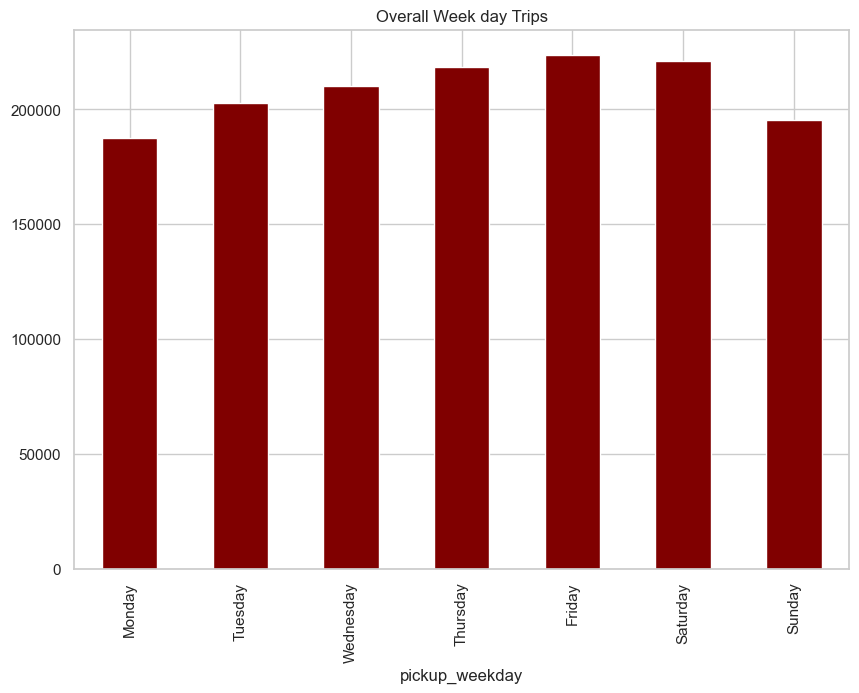

In [20]:
#Analyzing week day trips

plt.figure(figsize=(10,7))
pickup_week = df_train['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='maroon')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

- By the viz. it's found that tax's are booked in weekdays ie) Friday and Staurday the most

In [21]:
#dropping unwanted columns

nyc_taxi_df_train = df_train.drop(['id','pickup_datetime','pickup_date','dropoff_datetime','pickup_day','pickup_month','pickup_hour','pickup_min','pickup_weekday','dropoff_min'], axis=1)
nyc_taxi_df_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435


# Normalization

In [22]:
#Predictors and Target Variable

X = nyc_taxi_df_train.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df_train['trip_duration'])

In [23]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0
...,...,...,...,...,...,...,...
1458639,1,4,-73.982201,40.745522,-73.994911,40.740170,0
1458640,0,1,-74.000946,40.747379,-73.970184,40.796547,0
1458641,1,1,-73.959129,40.768799,-74.004433,40.707371,0
1458642,0,1,-73.982079,40.749062,-73.974632,40.757107,0


In [24]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = ["vendor_id","passenger_count","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","store_and_fwd_flag"]

ss = StandardScaler()

X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471


In [25]:
test_df = ss.fit_transform(X)
test_df = pd.DataFrame(test_df, columns=cols)
test_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471


Normalizing the Dataset using Standard Scaling Technique.


Now, Why Standard Scaling ? Why not MinMax or Normalizer ?


- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.


- While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

**Model Building**

In [26]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 7), (437594, 7), (1021050,), (437594,))

# Linear Regression

In [27]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.52740229, 6.41717086, 6.60582487, ..., 6.46680195, 6.42958313,
       6.52096788])

In [28]:
# Predicting for the test data

test_pred = est_lr.predict(test_df)
test_pred

array([6.38681547, 6.50906622, 6.51481282, ..., 6.53281911, 6.42618312,
       6.27948255])

In [29]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.464223290792994,
 array([ 0.01345714,  0.01261838,  0.08990312, -0.08434683, -0.00789908,
        -0.07061351,  0.01068175]))

In [30]:
#examining scores

print("Training Score : " , est_lr.score(X_train, y_train))

print("Validation Score : ", est_lr.score(X_test, y_test))

print("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print("R2_Score : ", r2_score(lr_pred, y_test))

Training Score :  0.038828739294321846
Validation Score :  0.04049005599778144
Cross Validation Score :  -0.05374692288532734
R2_Score :  -25.61817217473185


Text(0.5, 1.0, 'Test VS Prediction')

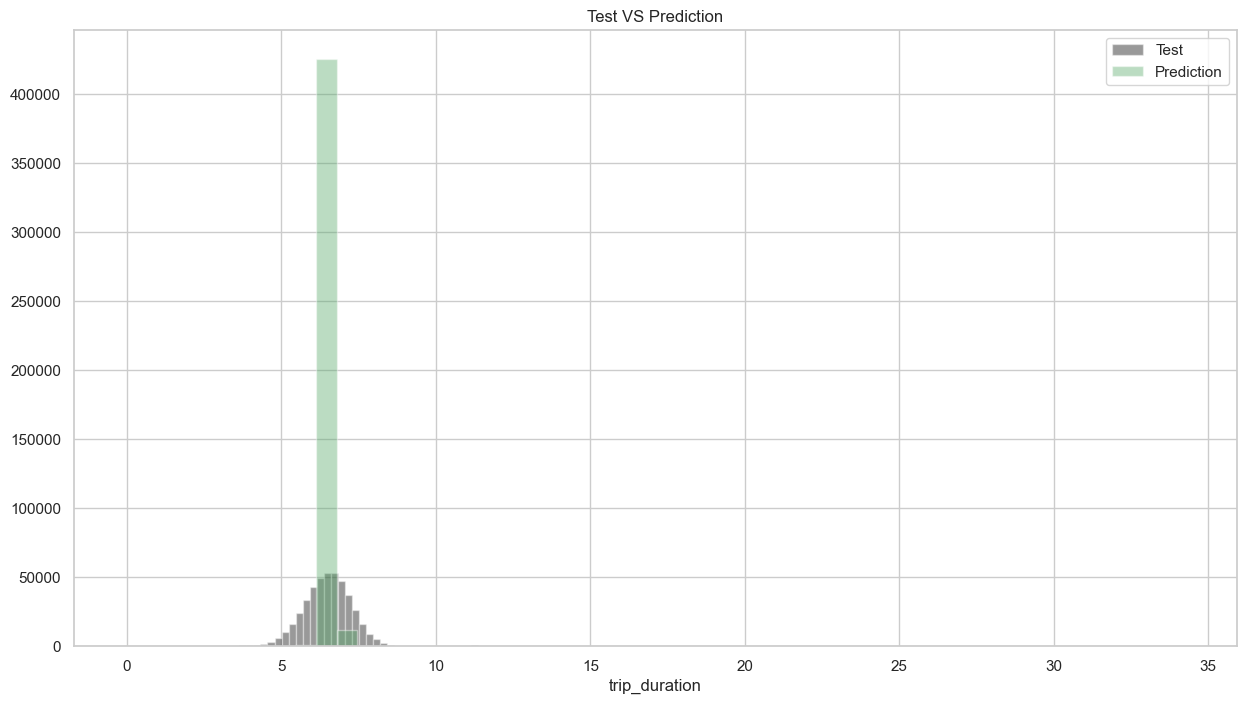

In [31]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in Grey) and Predicted values (in Green) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

# Random Forest 

- Now, Let us also try Random Forest on our Data and see what do we get.

In [32]:
#random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

rf_pred = est_rf.predict(X_test)
rf_pred

array([6.44735732, 7.35705629, 6.52799385, ..., 5.95868651, 7.06499451,
       6.74127525])

In [33]:
# Predicting for the test data

test_pred = est_rf.predict(test_df)
test_pred

array([6.54025583, 6.44214356, 7.60182938, ..., 6.80649646, 5.96020399,
       5.45116046])

In [34]:
#examining metrics 

print("Training Score : " , est_rf.score(X_train, y_train))

print("Validation Score : ", est_rf.score(X_test, y_test))

print("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print("R2_Score : ", r2_score(rf_pred, y_test))

print("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9536915751468379
Validation Score :  0.6704804905117872
Cross Validation Score :  0.6678684481215034
R2_Score :  0.5353102508532384
RMSLE :  0.06787108759852044


Text(0.5, 1.0, 'Test VS Prediction')

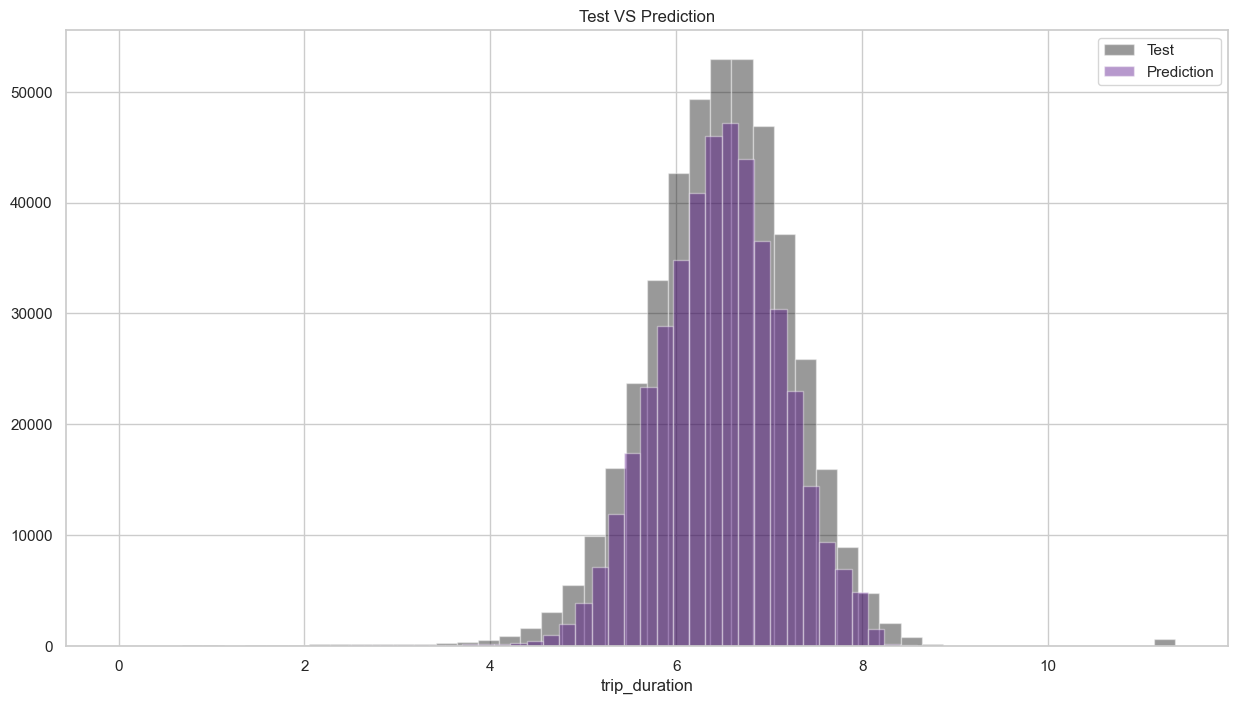

In [35]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Random Forest Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.


- Similarly, we can Hyper tune Random Forest to get the most out of it.

# R2 Scores Evaluation

Text(0.5, 1.0, 'R2 Scores')

<Figure size 800x700 with 0 Axes>

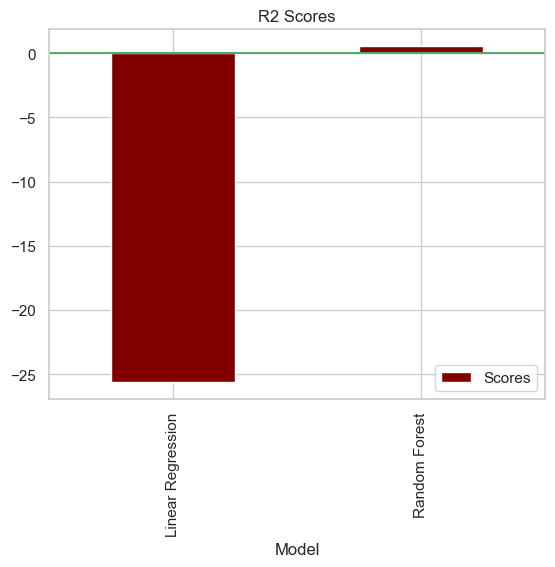

In [36]:
#r2 score plot for all models

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")